# Principal Component Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Data Mining/credit_card.csv")

In [2]:
display(data)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
X = data.iloc[:,13:16].values ##ambil data credit_limit, payments, minimum_payments
Y = data.iloc[:,-1].values

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data.iloc[:,13:16].values)
data.iloc[:,13:16]=imputer.transform(data.iloc[:,13:16].values)
X = data.iloc[:,13:16].values
data.iloc[:,13:16]

,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,1000.0,201.802084,139.509787
1,7000.0,4103.032597,1072.340217
2,7500.0,622.066742,627.284787
3,7500.0,0.000000,864.206542
4,1200.0,678.334763,244.791237
...,...,...,...
8945,1000.0,325.594462,48.886365
8946,1000.0,275.861322,864.206542
8947,1000.0,81.270775,82.418369
8948,500.0,52.549959,55.755628


In [5]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [6]:
X_train

array([[2000.      ,  945.67939 ,  921.657393],
       [2500.      ,  325.966302,  146.604543],
       [2000.      ,  352.353973,   95.559258],
       ...,
       [1500.      ,  962.749997, 1982.872638],
       [8500.      , 1828.965006, 1313.883915],
       [4000.      ,  618.964215,  268.075781]])

In [7]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.49575001 0.31249288 0.19175711]


In [9]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.49575001 0.31249288]


In [10]:
X_train

array([[-0.62701639,  0.25699209],
       [-0.79172411, -0.04775072],
       [-0.88386272, -0.03886371],
       ...,
       [-0.55537955,  0.72969442],
       [ 0.80655006, -0.07086476],
       [-0.43620015, -0.11774524]])

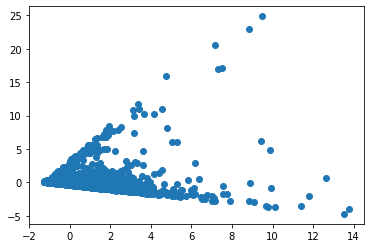

In [11]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
Y_pred = clf.predict(X_test)

In [14]:
Y_pred

array([12, 12, 12, ..., 12, 12, 12])

In [15]:
Y_train

array([12, 12, 12, ..., 12, 12, 12])

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[   0,    0,    0,    0,    0,    0,   48],
       [   0,    0,    0,    0,    0,    0,   48],
       [   0,    0,    0,    0,    0,    0,   55],
       [   0,    0,    0,    0,    0,    0,   37],
       [   0,    0,    0,    0,    0,    0,   53],
       [   0,    0,    0,    0,    0,    0,   93],
       [   0,    0,    0,    0,    0,    0, 1904]])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8507596067917784

In [18]:
clf.score(X_test, Y_test)

0.8507596067917784

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

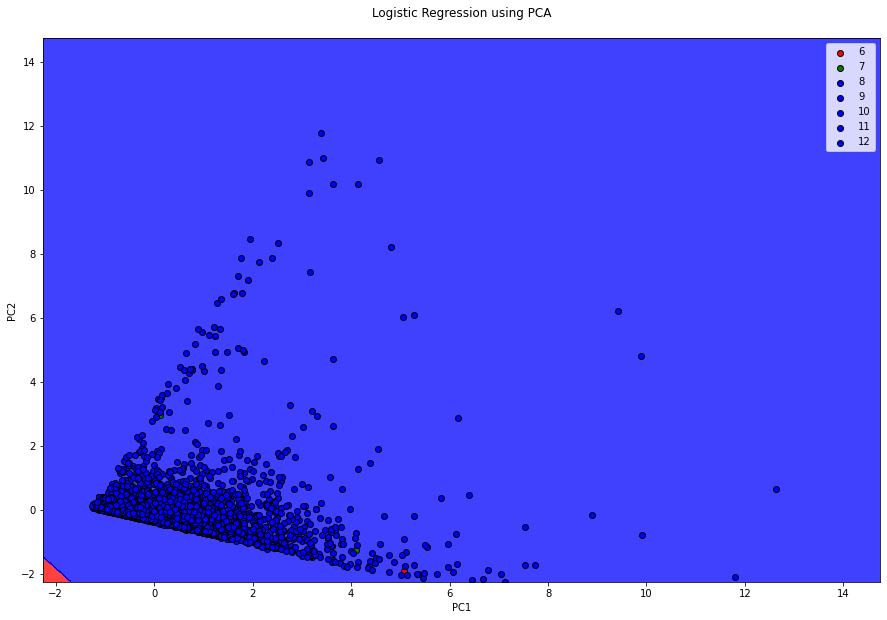

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using PCA\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()